# Capping / Censoring outliers

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

In this notebook, we will cap the variable values at certain limits.

We we calculate those limits using:

- The normal distribution
- The IQR proximity rule
- The quantiles

In a dataset like this one, we probably don't want to get rid of rare occurrences, because those would probably point us to the disease diagnosis.

Please, be mindful, when removing outliers, that they may be actually informative, depending on your use case.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from feature_engine.outliers import Winsorizer

In [2]:
# load the California House price data from Scikit-learn
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target

# let's separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

# size
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [3]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,12.40,21.90,82.04,467.6,0.1352,0.2010,0.25960,0.07431,0.2941,0.09180
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,13.59,25.22,86.60,564.2,0.1217,0.1788,0.19430,0.08211,0.3113,0.08132
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.1234,0.2445,0.35380,0.15710,0.3206,0.06938
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,7.93,19.54,50.41,185.2,0.1584,0.1202,0.00000,0.00000,0.2932,0.09382


In [4]:
def plot_boxplot_and_hist(data, variable):
    
    # creating a figure composed of two matplotlib.Axes 
    # objects (ax_box and ax_hist)
    
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    # assigning a graph to each ax
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.title(variable)
    plt.show()

## Normal distribution

In [5]:
capper = Winsorizer(
    variables=["worst smoothness", "worst texture"],
    capping_method="gaussian",
    tail="both",
    fold=2,
)

capper.fit(X_train)

Winsorizer(fold=2, tail='both', variables=['worst smoothness', 'worst texture'])

In [6]:
capper.left_tail_caps_

{'worst smoothness': 0.08660797490028552, 'worst texture': 13.25504557310801}

In [7]:
capper.right_tail_caps_

{'worst smoothness': 0.1784501155519758, 'worst texture': 37.81399965302265}

In [8]:
X_train_tr = capper.transform(X_train)
X_test_tr = capper.transform(X_test)

X_train_tr[capper.variables_].max()

worst smoothness     0.17845
worst texture       37.81400
dtype: float64

In [9]:
X_train_tr[capper.variables_].min()

worst smoothness     0.086608
worst texture       13.255046
dtype: float64

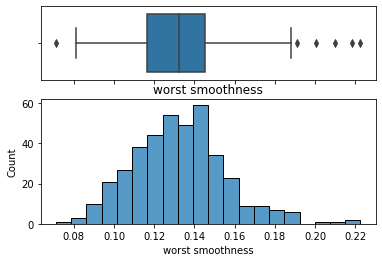

In [10]:
# before capping

plot_boxplot_and_hist(X_train, "worst smoothness")

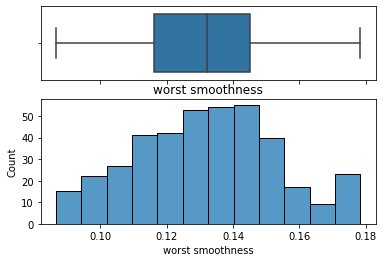

In [11]:
# after capping

plot_boxplot_and_hist(X_train_tr, "worst smoothness")

## IQR

In [12]:
capper = Winsorizer(
    variables=["worst smoothness", "worst texture"],
    capping_method="iqr",
    tail="both",
    fold=1.5,
)

capper.fit(X_train)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['worst smoothness', 'worst texture'])

In [13]:
capper.left_tail_caps_

{'worst smoothness': 0.07283749999999997, 'worst texture': 7.983749999999995}

In [14]:
capper.right_tail_caps_

{'worst smoothness': 0.18873750000000003, 'worst texture': 42.33375}

In [15]:
X_train_tr = capper.transform(X_train)
X_test_tr = capper.transform(X_test)

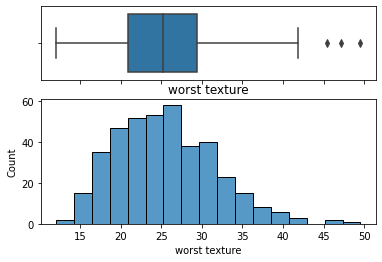

In [16]:
# before capping

plot_boxplot_and_hist(X_train, "worst texture")

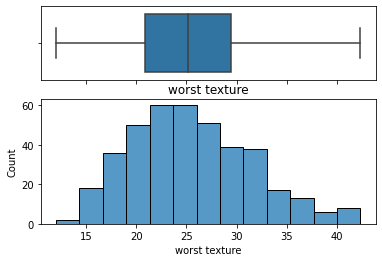

In [17]:
# after capping

plot_boxplot_and_hist(X_train_tr, "worst texture")

## Quantiles

In [18]:
capper = Winsorizer(
    variables=["worst smoothness", "worst texture"],
    capping_method="quantiles",
    tail="both",
    fold=0.05,
)

capper.fit(X_train)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['worst smoothness', 'worst texture'])

In [19]:
capper.left_tail_caps_

{'worst smoothness': 0.0960535, 'worst texture': 16.7975}

In [20]:
capper.right_tail_caps_

{'worst smoothness': 0.17321499999999998, 'worst texture': 36.2775}

In [21]:
X_train_tr = capper.transform(X_train)
X_test_tr = capper.transform(X_test)

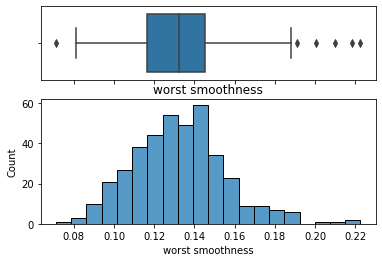

In [22]:
# before capping

plot_boxplot_and_hist(X_train, "worst smoothness")

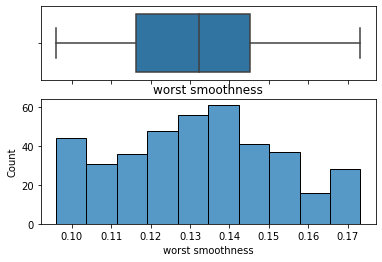

In [23]:
# after capping

plot_boxplot_and_hist(X_train_tr, "worst smoothness")